# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset

df = pd.read_csv('previsao_de_renda.csv')

/tmp/ipykernel_1157782/2919921015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)


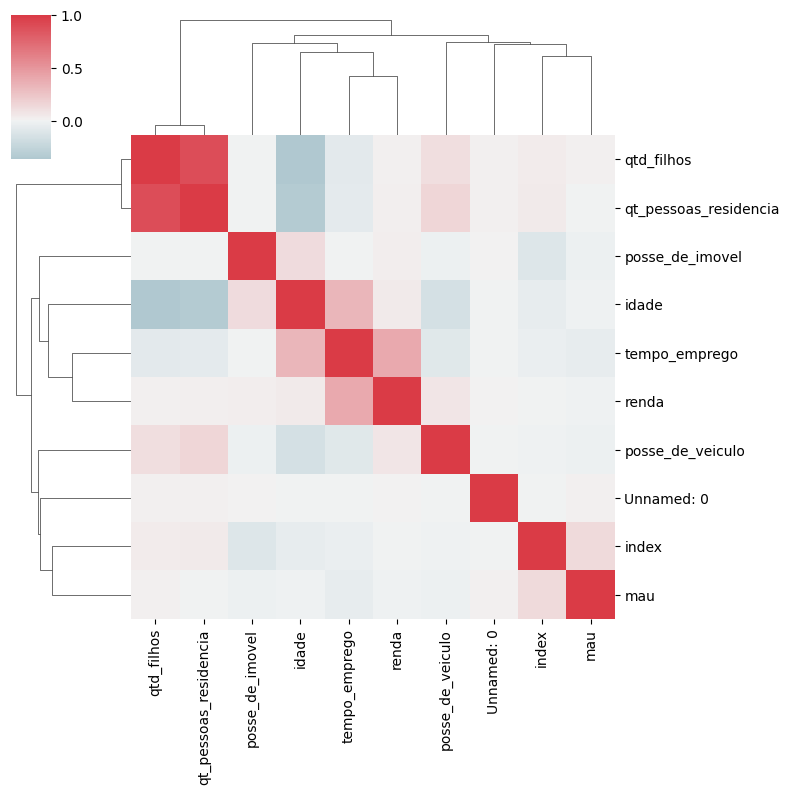

In [10]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

renda                    1.000000
tempo_emprego            0.394235
posse_de_veiculo         0.063414
idade                    0.042570
posse_de_imovel          0.029827
qt_pessoas_residencia    0.020977
qtd_filhos               0.009567
Unnamed: 0               0.007646
index                   -0.001740
mau                     -0.011577
Name: renda, dtype: float64


/tmp/ipykernel_1157782/829270351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_renda = df.corr()['renda'].sort_values(ascending=False)


<Axes: xlabel='tempo_emprego', ylabel='renda'>

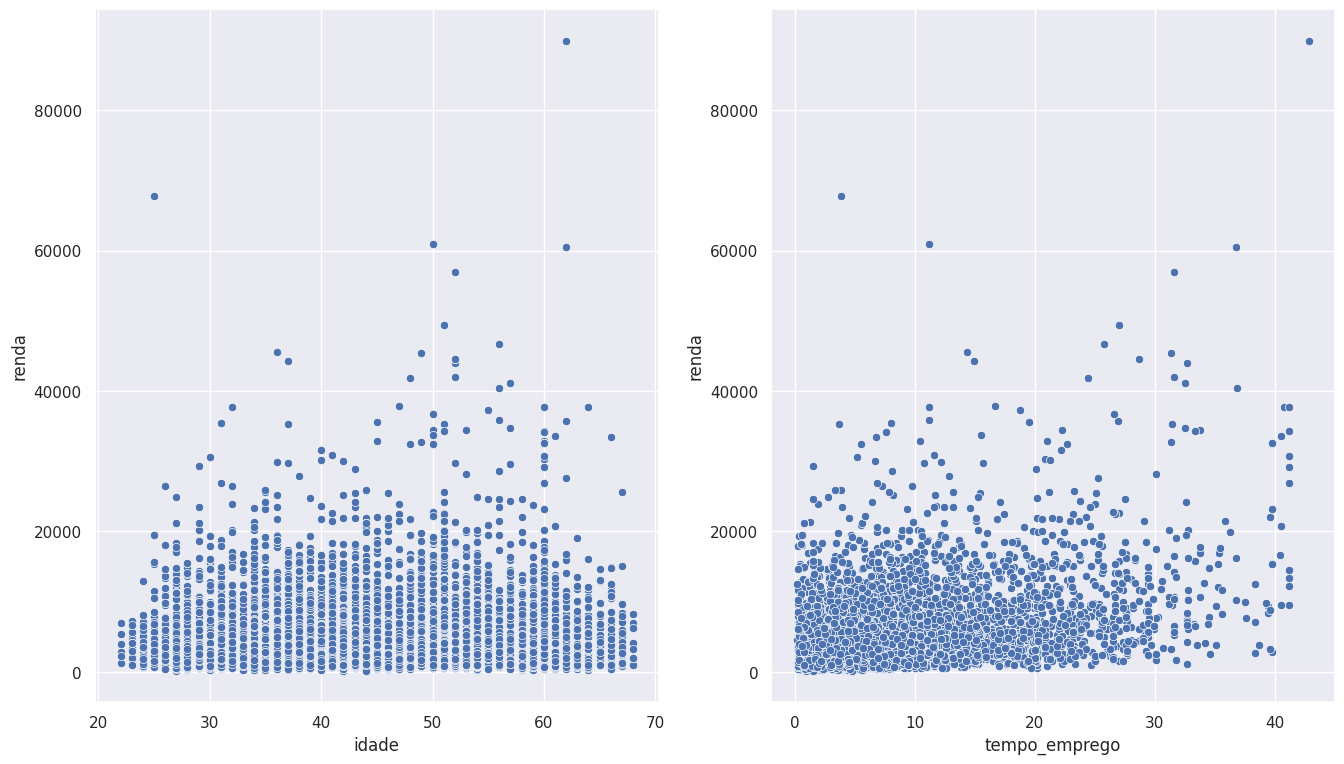

In [28]:
corr_renda = df.corr()['renda'].sort_values(ascending=False)
print(corr_renda)
renda_qnt = df[['renda', 'idade', 'tempo_emprego']]
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 9)
sns.scatterplot(x='idade', y='renda', data=renda_qnt, ax=axes[0])
sns.scatterplot(x='tempo_emprego', y='renda', data=renda_qnt, ax=axes[1])

Podemos observar tanto nos números quanto no gráfico que apesar da idade ser a segunda variável com maior correlação à renda, a mesma não chega perto de ser tão relevante quanto o tempo de emprego.

Podemos também observar muitos outliers em todos os tempos de emprego. Podemos observar também que a dispersão se torna muito maior conforme o tempo de emprego, o que pode ser explicado também pela menor contagem de amostrar nesses casos. Essa dispersão também é maior para a idade, especialmente entre 45 e 60 anos, o que pode estar relacionado com a faixa etária ser responsável por momentos decisivos na carreira profissional.

3) Na su aopinião, há outliers na variável renda?

Sim, há alguns casos de outliers na variável renda. Valores acima de 50 mil parecem já poderem ser considerados outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='tempo_emprego', ylabel='renda'>

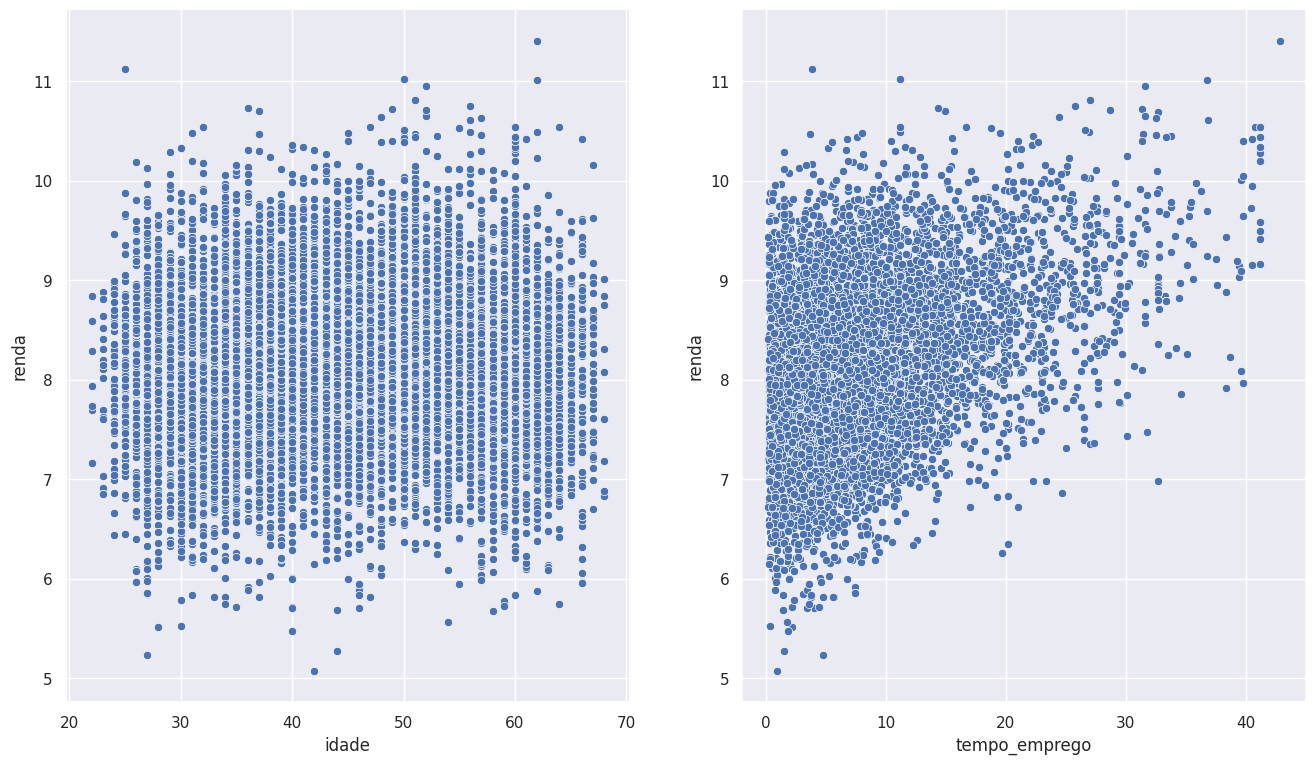

In [30]:
df_log_renda = df.copy()
df_log_renda['renda'] = np.log(df_log_renda['renda'])
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 9)
sns.scatterplot(x='idade', y='renda', data=df_log_renda, ax=axes[0])
sns.scatterplot(x='tempo_emprego', y='renda', data=df_log_renda, ax=axes[1])

Utilizando o log da renda, temos uma distribuição mais normal e com menos outliers.

Conseguimos ver mais claramente a relação do tempo de emprego com a renda, notamos uma menor dispersão em ambas as variáveis relacionadas.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Notamos melhoras para observar as relações, especialmente a relação com o tempo de emprego.